### Reference from : https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier

In [138]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [139]:
full_data[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Feature Engineering

In [140]:
#1. Pclass

print (train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


#### Pclass has good impact on the chance of survival

In [141]:
#2.  Sex
#train[['Pclass', 'Survived']]

print (train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())

##print (train["Sex"].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


#### Sex has a major role in determining survival

In [142]:
#3. With SibSp and Parch, we can create a new feature - family size. 

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


#### Family size has a good impact on the chance of survival

In [143]:
## Does being alone affect chance of survival? 

for dataset in full_data:
    dataset['IsAlone'] = 0

    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


#### "Being alone" has a good impact on the chance of survival 

Need to fill in missing values in Embarked

In [144]:
## Missing values in Embarked

for dataset in full_data:
    print(dataset['Embarked'].isna().sum())
    

2
0


In [145]:
## Most common value in Embarked

for dataset in full_data:
    print(dataset['Embarked'].mode())
    
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())    

0    S
dtype: object
0    S
dtype: object
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [146]:
## Fill missing values in Embarked with 'S'

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


Need to fill missing values in Fare

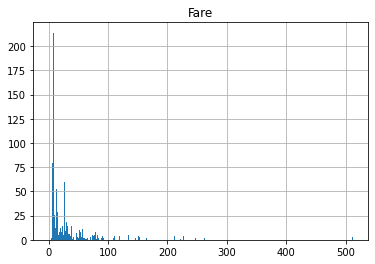

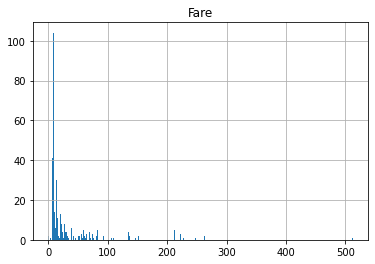

In [147]:
for dataset in full_data:

    dataset.hist(bins=400, column='Fare')

In [148]:
## Can fill missing values in 'Fare' with median value (as per the above histograms)

for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [149]:
## Since 'Fare' is a continuous variable, we can categorize it into 4 blocks (better statistics and classification)

train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).count())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081
   CategoricalFare  Survived
0   (-0.001, 7.91]       223
1   (7.91, 14.454]       224
2   (14.454, 31.0]       222
3  (31.0, 512.329]       222


#### categorizing the 'FARE' into 4 groups makes the following clear: higher fares is co-orelated with higher chance survival

In [150]:
## Missing values in 'Age'

for dataset in full_data:
    print(dataset['Age'].isna().sum())

177
86


In [151]:
## Since there are a lot of missing values in 'Age', we need to generate a bunch of random numbers between mean +- std

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
    dataset.loc[np.isnan(dataset['Age']) == 1, 'Age'] = age_null_random_list
    
    ##dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    ##dataset['Age'] = dataset['Age'].astype(int)

In [152]:
## Missing values in 'Age'

for dataset in full_data:
    print(dataset['Age'].isna().sum())

0
0


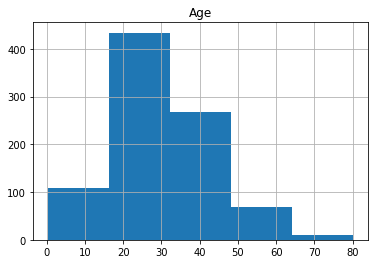

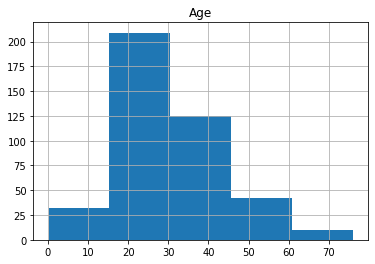

In [153]:
for dataset in full_data:

    dataset.hist(bins=5, column='Age')

In [154]:
## Lets divide 'Age' into 5 categories (as per hsitogram)

train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).count())

     CategoricalAge  Survived
0    (0.34, 16.336]  0.541284
1  (16.336, 32.252]  0.354839
2  (32.252, 48.168]  0.365672
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909
     CategoricalAge  Survived
0    (0.34, 16.336]       109
1  (16.336, 32.252]       434
2  (32.252, 48.168]       268
3  (48.168, 64.084]        69
4    (64.084, 80.0]        11


50% of childern under the age of 16 survived (good classifier)

Nearly all people above the age of 64 did not survived. Since there are only 11 people in this categoery, it may not serve as a good classifier

#### NAME

In [155]:
## The titles of passpengers can be used as a feature

def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

## Cross tab can be used when you the "group by feature" is something like Male-Female. 


print(pd.crosstab(train['Title'], train['Sex']))


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [156]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


#### Titles have a significant impact on survival. 

#### Females and young males (Master) have higher chance of survival. 

#### Whereas adult males (Mr) have very low chance of survival

# Data Cleaning: Categorize all columns

In [157]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']


In [161]:



#train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

##test  = test.drop(drop_elements, axis = 1)

##print (train.head(10))

##train = train.values
##test  = test.values

In [162]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,1,1.0,0,0,0,1
1,1,1,0,2.0,3,1,0,3
2,1,3,0,1.0,1,0,1,2
3,1,1,0,2.0,3,0,0,3
4,0,3,1,2.0,1,0,1,1


In [165]:
##test  = test.drop(drop_elements, axis = 1)
test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,3,1,2.0,0,2,1,1
1,3,0,2.0,0,0,0,3
2,2,1,3.0,1,2,1,1
3,3,1,1.0,1,0,1,1
4,3,0,1.0,1,0,0,3


In [166]:
train = train.values
test  = test.values

In [170]:
np.size(train)

7128

## Dataset it clean; Now check which classifier works the best

In [171]:
## Import libraries

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [172]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]


In [173]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

In [174]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [175]:
X = train[0::, 1::]
y = train[0::, 0]

In [177]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

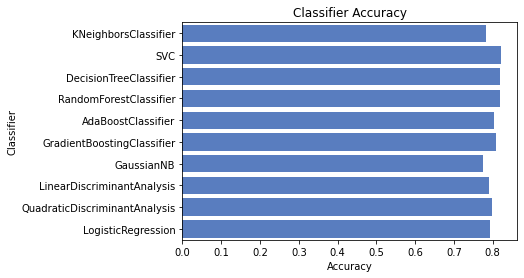

In [178]:
acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [189]:
## Best performer: SVC

candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)


/tmp/ipykernel_12432/1797942456.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.int(result)


TypeError: only size-1 arrays can be converted to Python scalars

In [190]:
A = result.astype(int)

In [191]:
test_data = pd.read_csv("test.csv")


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': A})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
